# VIOLENCIA DE GÉNERO EN ARGENTINA
## 1) INTRODUCCIÓN
### 1) 1. CONTEXTO EMPRESARIAL
A lo largo de los años, la situación vulnerable de la mujer en Argentina se está haciendo visible. Por lo que, exponer la cantidad de casos y sus efectos a toda la sociedad, contribuye a la visibilizacion de las mujeres que han sufrido y las que continuarán sufirendo a causa de la desigualdad de género. Además, permitiran avanzar pasos transcendentales en materia de políticas públicas en favor de la igualdad y contra las violencias de género. Generando acciones de corto, mediano y largo plazo sustentadas para la prevención, asistencia integral y protección de aquellas mujeres que atraviesan estas situaciones de violencia. Haciendo hincapie en aquellas. Por lo que, es muy importante analizar que edades son la que mayor cantidad de casos hay y en que provincias. 
La informacion obtenida corresponde a aquellas comunicaciones recibidad por la Línea 144, en donde las personas que se comunican acceden a dejar sus datos para un adecuado abordaje y seguimiento. Los registros corresponden a tres sedes: Provincia de Buenos Aires, CABA y la sede de gestión nacional. 

### 1) 2. CONTEXTO ANALÍTICO
La informacion obtenida corresponde a dos fuentes:
- El archivo ¨ViolenciaGenero2.0.xlsx" que contiene el historial de los casos de violencia de género en la Argentina desde el 2020.Se obtuvieron de comunicaciones recibidas por la Línea 144, en donde las personas que se comunican acceden a dejar sus datos para un adecuado abordaje y seguimiento. Los registros corresponden a tres sedes: Provincia de Buenos Aires, CABA y la sede de gestión nacional.
- El archivo "Violencia_Kaggle.xlsx" es un dataset que se obtuvo a partir de la API Kaggle.

### 1) 3. OBJETIVOS
En este caso, se busca realizar un análisis estadístico y su consecuente compresión de los valores con el fin de determinar las provincias y edades más afectadas. Además, se analizará los datos obtenidos de otros paises para comprender el contexto mundial sobre y hacia la violencia de género. 

## 2) HIPOTESIS
Las preguntas a responder son:
 - Como fueron modificando la cantidad de casos de viuolencia de género en Argentina?
 - En que provincias se producen más casos?
 - Cuales son las edades en las que se produce más violencia?
 - Cual es la relación con el agresor? Varía en función de la edad?
 - Cuales son los paises con mayor cantidad de casos de violencia de género?
 - Cuales son las edades más vulnerables?
 
 
## 3) LIMPIEZA Y TRANSFORMACION DE DATOS

In [1]:
import pandas                  as pd
from   scipy import stats
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
import chart_studio.plotly     as py
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
# https://community.plot.ly/t/solved-update-to-plotly-4-0-0-broke-application/26526/2
import os

import plotly.express    as px
import matplotlib.pyplot as plt

In [2]:
#IMPORTAMOS BASE DE DATOS 1
bd=pd.read_excel(r'C:\Users\garro\OneDrive\Escritorio\DATA SCIENCE\TRABAJO PRACTICO\ViolenciaGenero2.3.xlsx', sheet_name='casos')

#CAMBIAMOS FORMATO DE LA COLUMNA FECHA A 'DATETIME'
bd['FECHA']=pd.to_datetime(bd.FECHA, errors='coerce')

#REMOCION DE OUTLIERS
Q1=bd['EDAD'].quantile(0.25)
Q3=bd['EDAD'].quantile(0.75)

IQR=Q3-Q1
mediana=bd['EDAD'].median()
valor_min=bd['EDAD'].min()
valor_max=bd['EDAD'].max()
Valor_BI=(Q1-1.5*IQR)
Valor_BS=(Q3+1.5*IQR)

def clean_age(age):
    if age>=Valor_BI and age<=Valor_BS:
        return age
    else:
            return mediana
        
bd['age_clean'] = bd['EDAD'].apply(clean_age)

#LIMPIEZA DE VALORES NULOS. REEMPLAZO POR MEDIA
bd['age_clean'].fillna(value=mediana, inplace=True)

In [3]:
#IMPORTAMOS BASE DE DATOS 2
raw_data = pd.read_excel(r'C:/Users/garro/OneDrive/Escritorio/DATA SCIENCE/TRABAJO PRACTICO/Violencia_Kaggle.xlsx', sheet_name='violencia')

#CAMBIAMOS FORMATO DE LA COLUMNA DE FECHA A 'DATETIME' Y DIVIDIMOS EN DIFERENTES RANGOS
raw_data['year'] = raw_data['Survey Year'].dt.year
raw_data['month'] = raw_data['Survey Year'].dt.month
raw_data['day'] = raw_data['Survey Year'].dt.day

#REMOCION DE VALORES NULOS
null = raw_data.isnull().sum()/raw_data.shape[0]*100


## 4) ANALISIS DE DATOS A PARTIR DE PREGUNTAS INICIALES
### 4)1. COMO FUERON MODIFICANDO LA CANTIDAD DE CASOS DE VIOLENCIA DE GENERO EN ARGENTINA?

C:\Users\garro\AppData\Local\Temp\ipykernel_23760\1998472776.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bd3=bd.groupby('FECHA_MES', as_index=False).sum()


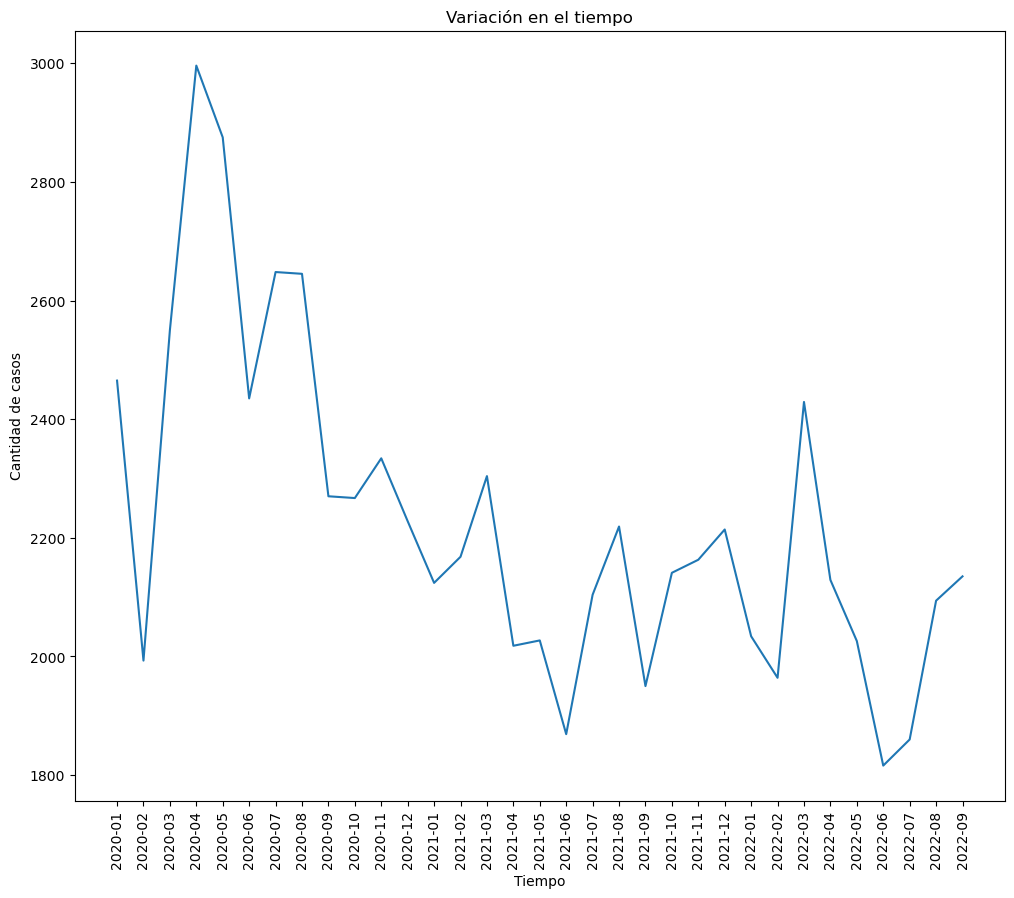

In [4]:
bd['FECHA'] = pd.to_datetime(bd['FECHA'], errors='coerce')
bd['FECHA_MES']=bd.FECHA.dt.to_period('M')
bd3=bd.groupby('FECHA_MES', as_index=False).sum()

bd3['FECHA_MES'] = bd3['FECHA_MES'].astype('str')

plt.figure(figsize=(12,10))
plt.plot(bd3.FECHA_MES, bd3.CASO)
plt.xticks(rotation = 'vertical')
plt.ylabel('Cantidad de casos')
plt.title('Variación en el tiempo')
plt.xlabel('Tiempo')
plt.show()

### 4) 2. CUALES SON LAS PROVINCIAS EN DONDE SE PRODUCEN MAS CASOS? CUALES SON LAS EDADES MAS VULNERABLES?


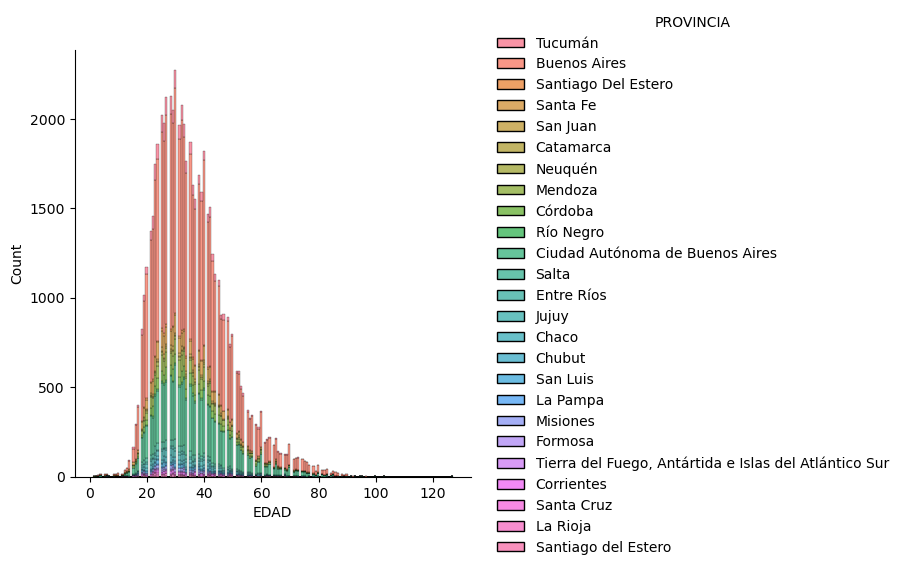

In [5]:
sns.displot(data=bd, x="EDAD", hue="PROVINCIA", multiple="stack")

### 4) 3. COMO VARÍA LA RELACION CON EL AGRESOR CON LA EDAD?

<Figure size 640x480 with 0 Axes>

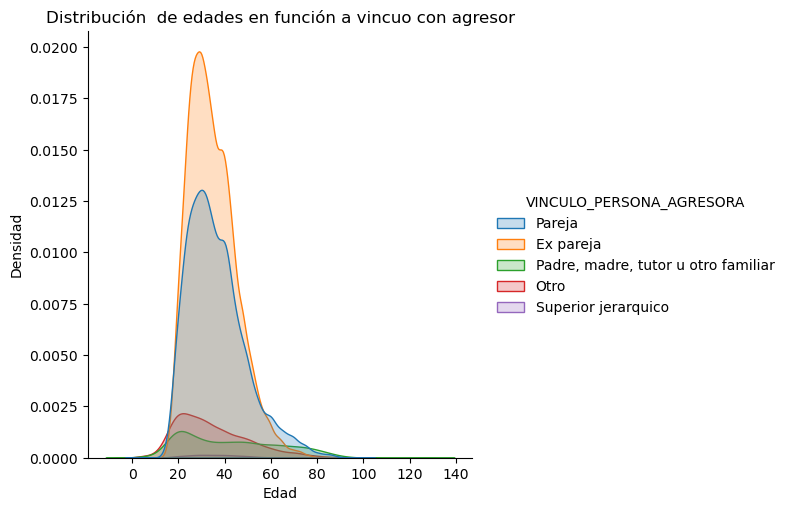

In [7]:
plt.figure()
# Figure -level
ax = sns.displot(data=bd, x='EDAD', kind='kde', hue='VINCULO_PERSONA_AGRESORA', fill=True)
ax.set(xlabel='Edad', ylabel='Densidad', title='Distribución  de edades en función a vincuo con agresor')

### 4) 4. QUE OPINA LA SOCIEDAD EN LA ACTUALIDAD CON RESPECTO A LA VIOLENCIA DE GENERO?

In [12]:
raw_survey_df = raw_data.pivot_table(index=['Country','Gender','Demographics Question','Demographics Response'],columns=['Question'], values=['Value'])

# Reset columns
survey_df = raw_survey_df.T.reset_index(drop=True).T.reset_index()

# Rename columns
survey_df.columns = ['country',
                     'gender',
                     'demographics_question',
                     'demographics_response',
                     'violence_any_reason',
                     'violence_argue',
                     'violence_food',
                     'violence_goingout',
                     'violence_neglect',
                     'violence_sex',
                    ]

# Examine Violence x gender
fig = px.box(survey_df.query("demographics_question == 'Age'").sort_values('violence_any_reason',ascending=False),
            x      = 'country',
            y      = 'violence_any_reason',
            color  = 'gender',
            title  = '% de las respuestas que se encuentran de acuerdo con la violencia',
            color_discrete_sequence = ['#4a00ba','#00ba82'],
            height = 650
        )

fig.update_xaxes(title='País')
fig.update_yaxes(title='% gente a favor de violencia')
fig.show()

### 4) 5. COMO ES LA OPINION HACIA LA VIOLENCIA DE GENERO EN FUNCION A LA EDAD?

In [13]:

# Examine Violence x Age group
fig = px.bar(survey_df.query("demographics_question == 'Age'").sort_values('violence_any_reason',ascending=False),
            x      = 'country',
            y      = 'violence_any_reason',
            color = 'demographics_response',
            title  = '% of Violence for any surveyed reason across Country and Age Group ',
            height = 650
        )

fig.update_xaxes(title='Country')
fig.update_yaxes(title='% Agrees: Violence is justified for any surveyed reason')
fig.show()

## 5) CONCLUSIONES
 - la mayor cantidad de casos se da en casos con victimas de un rango de edad de entre 27-43 años, siendo la edad en la que se concentra el 50% de los casos a los 34 años
 - la provincia con mayor cantidad de casos es Buenos Aires, mientras que la de menor cantidad es La Pampa 
 - Las víctimas cuyo agresor es un familiar (madre, padre, tutor o otro familiar) se encuentran entre los 11 y 20 años.  Mientras que, aquellas en las que el agresor es la pareja o ex pareja son de entre 18 a 45 años.
 -  un nivel de educación superior garantizará una menor cantidad de casos de violencia como consecuencia del rechazo a hacia esta.
 - Las generaciones mas grandes son las que mas a favor se encuentran hacia la violencia de género